In [ ]:
 !pip install ultralytics 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
from sklearn.model_selection import KFold

import yaml

In [3]:
from ultralytics import YOLO

In [4]:
RANDOM = 20241203 #40 epochs
RANDOM2 = 20241121 #20 epochs
IMAGE_H = 1486
IMAGE_W = 2048

cmap = plt.get_cmap('tab20').colors

### Class

In [5]:
with open ('/kaggle/input/renue-images-labels/trash_dict') as file:
    trash_dict = eval(file.read())
trash_dict

{1: 'PET (transparent) (green)',
 2: 'PET (transparent) (brown)',
 3: 'PET (transparent) (blue)',
 4: 'PET (transparent)',
 5: 'PET (transparent) (dark blue)',
 6: 'PET (black)',
 7: 'PET (white)',
 8: 'PET (sticker)',
 9: 'PET (flacon)',
 10: 'PET (household chemicals)',
 11: 'PND (household chemicals)',
 12: 'PND packet',
 13: 'Other plastic',
 14: 'Other plastic (transparent)',
 15: 'Not plastic'}

In [6]:
with open ('/kaggle/input/renue-images-labels/trash_dict_yolo') as file:
    trash_dict_yolo = eval(file.read())
trash_dict_yolo

{0: 'PET (transparent) (green)',
 1: 'PET (transparent) (brown)',
 2: 'PET (transparent) (blue)',
 3: 'PET (transparent)',
 4: 'PET (transparent) (dark blue)',
 5: 'PET (black)',
 6: 'PET (white)',
 7: 'PET (sticker)',
 8: 'PET (flacon)',
 9: 'PET (household chemicals)',
 10: 'PND (household chemicals)',
 11: 'PND packet',
 12: 'Other plastic',
 13: 'Other plastic (transparent)',
 14: 'Not plastic'}

### Train

In [7]:
train_df = pd.read_csv('/kaggle/input/renue-images-labels/train_df.csv')
train_df

,Unnamed: 0,file_name,bbox,category_id,yolo,yaml
0,0,000001.jpg,"[840.0, 0.0, 176.0, 124.0]",4,"[0.453125, 0.04172274562584118, 0.0859375, 0.0...",3 0.453125 0.04172274562584118 0.0859375 0.083...
1,1,000001.jpg,"[612.0, 306.0, 383.0, 397.0]",2,"[0.392333984375, 0.3395020188425303, 0.1870117...",1 0.392333984375 0.3395020188425303 0.18701171...
2,2,000001.jpg,"[990.92, 551.0, 105.00000000000011, 186.0]",4,"[0.509482421875, 0.43337819650067294, 0.051269...",3 0.509482421875 0.43337819650067294 0.0512695...
3,3,000002.jpg,"[1000.0, 614.0, 98.0, 178.0]",4,"[0.51220703125, 0.4730820995962315, 0.04785156...",3 0.51220703125 0.4730820995962315 0.047851562...
4,4,000002.jpg,"[605.0, 358.0, 402.0, 409.0]",2,"[0.3935546875, 0.3785329744279946, 0.196289062...",1 0.3935546875 0.3785329744279946 0.1962890625...
...,...,...,...,...,...,...
32143,32260,008999.jpg,"[1220.0, 0.0, 167.0, 236.0]",2,"[0.636474609375, 0.07940780619111709, 0.081542...",1 0.636474609375 0.07940780619111709 0.0815429...
32144,32261,009000.jpg,"[1218.0, 40.0, 169.0, 254.0]",2,"[0.635986328125, 0.11238223418573351, 0.082519...",1 0.635986328125 0.11238223418573351 0.0825195...
32145,32262,009000.jpg,"[320.0, 631.0, 527.0, 218.0]",1,"[0.284912109375, 0.4979811574697174, 0.2573242...",0 0.284912109375 0.4979811574697174 0.25732421...
32146,32263,009000.jpg,"[1157.0, 1454.0, 65.0, 31.0]",2,"[0.580810546875, 0.9888963660834454, 0.0317382...",1 0.580810546875 0.9888963660834454 0.03173828...


In [8]:
train_df.loc[:, 'bbox'] = train_df.bbox.apply(eval)
train_df.loc[:, 'yolo'] = train_df.yolo.apply(eval)

## Check

In [ ]:
images_input = '/kaggle/input/renue-images-labels/images/'
images_train = sorted(set(train_df.file_name))
#images_train = images_train[:10] #demo

images_path = [os.path.join(images_input, x) for x in images_train]

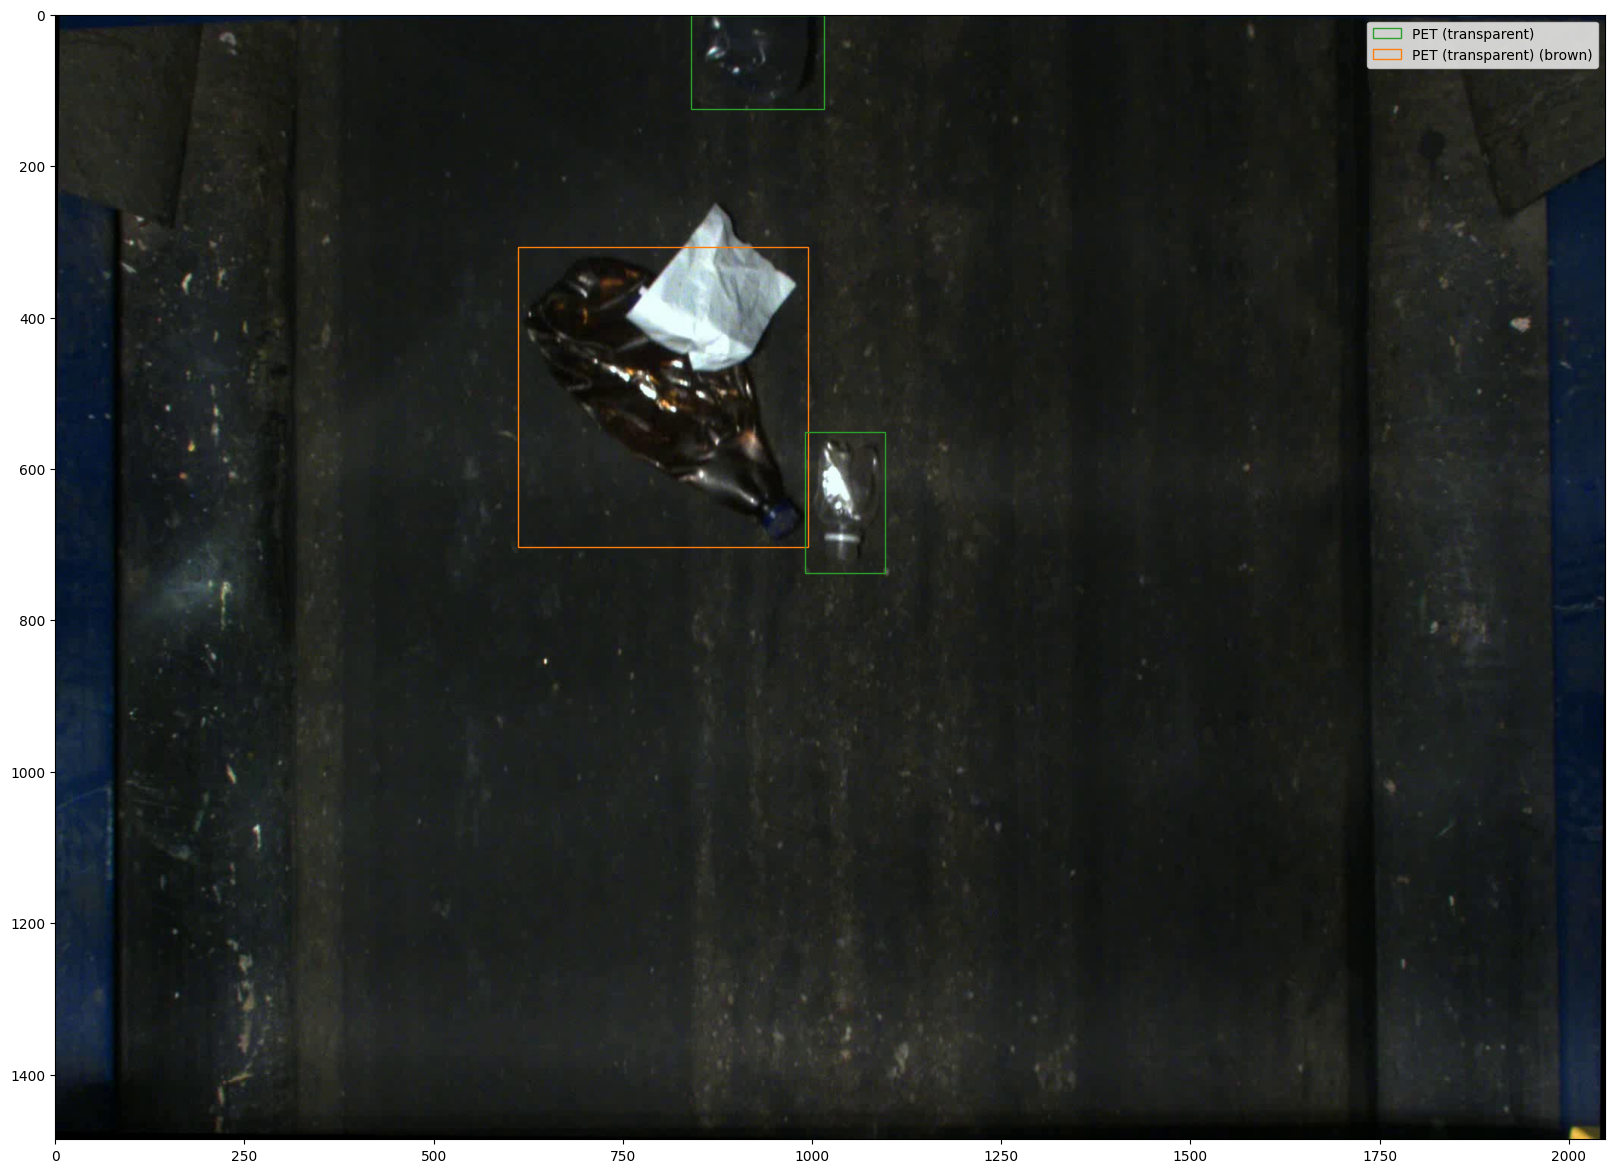

In [10]:
sample_001 = train_df.query('file_name == "000001.jpg"')
sample_001_i = Image.open('/kaggle/input/renue-images-labels/images/000001.jpg')
labels = set([])

fig, ax = plt.subplots(figsize=(20, 20))

ax.imshow(sample_001_i)

for _ in range(len(sample_001)):
    cat = sample_001.loc[_, 'category_id']
    cat_name = trash_dict[cat]
    label = cat_name if cat_name not in labels else ""
    labels.add(cat_name)
    rect = sample_001.loc[_, 'bbox']    
    rect = [[rect[0], rect[1]], rect[2], rect[3]]
    ax.add_patch(patches.Rectangle(*rect, linewidth=1, edgecolor=cmap[cat], facecolor='none', label=label))
    

ax.legend()
plt.show()

## YAML

In [11]:
renue_yaml = {
    "path": "..",
    "train": "train.txt",
    "val": "val.txt",
    "nc":15,
    "names": trash_dict_yolo
}

with open("renue.yaml", "w") as file:
    yaml.safe_dump(renue_yaml, file, sort_keys=False)

with open('/kaggle/working/renue.yaml', 'r') as file:
    print(file.read())

path: ..
train: train.txt
val: val.txt
nc: 15
names:
  0: PET (transparent) (green)
  1: PET (transparent) (brown)
  2: PET (transparent) (blue)
  3: PET (transparent)
  4: PET (transparent) (dark blue)
  5: PET (black)
  6: PET (white)
  7: PET (sticker)
  8: PET (flacon)
  9: PET (household chemicals)
  10: PND (household chemicals)
  11: PND packet
  12: Other plastic
  13: Other plastic (transparent)
  14: Not plastic



In [12]:
model = YOLO('/kaggle/input/yolo11/pytorch/default/1/yolo11m.pt')

In [13]:
# num runs, random state, imgsz

def train_yolo_5KFolds(runs, random_state, imgsz):
    for j in range(runs):
        kf = KFold(shuffle=True, random_state=random_state)
        for i, (train_index, val_index) in enumerate(kf.split(images_path)):
            print(f"RS: {random_state} Cycle {j+1} Fold {i+1}:")
            train = [images_path[x] for x in train_index]
            with open('train.txt', 'w') as file:
                file.write('\n'.join(train))
            val = [images_path[x] for x in val_index]
            with open('val.txt', 'w') as file:
                file.write('\n'.join(val))
            results = model.train(data="renue.yaml",
                                  batch=.9, epochs=2,
                                  imgsz=imgsz
                                 )

In [ ]:
train_yolo_5KFolds(4, RANDOM, 1024)
train_yolo_5KFolds(2, RANDOM2, 1024)

In [ ]:
runs/detect/train22222222222222222222222222222